In [2]:
#Import the necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load The dataset
data = pd.read_csv('https://raw.githubusercontent.com/paathelb/data-science-projects/master/data/heart.csv')

#Remove datasets with question marks
data = data[(data != '?').all(axis=1)]

#Show top rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Define X and y
X= data.drop('target', axis = 1)
y = data[['target']]
X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 13 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 33.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 1 columns):
target    303 non-null int64
dtypes: int64(1)
memory usage: 4.7 KB


In [4]:
#Normalize feature variables
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [5]:
# Split the dataset into training set and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [8]:
!pip install Keras

# Define your model 
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import tensorflow as tf

np.random.seed(seed)
tf.set_random_seed(seed)

model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_1.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0, shuffle=False)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 377 kB 3.5 MB/s eta 0:00:01


Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


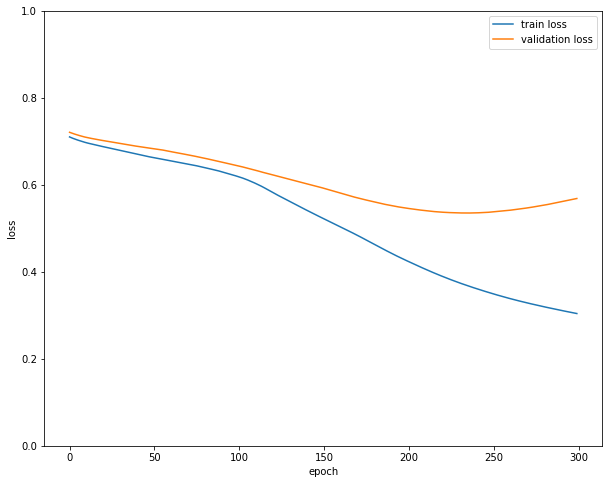

In [9]:
# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

# plot training error and validation error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [10]:
#Define your model with early stopping on test error
from keras.callbacks import EarlyStopping
np.random.seed(seed)
tf.set_random_seed(seed)

model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_2.compile(optimizer='sgd', loss='binary_crossentropy')

# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min')

# train the model
history=model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, callbacks=[es_callback], verbose=0, shuffle=False)

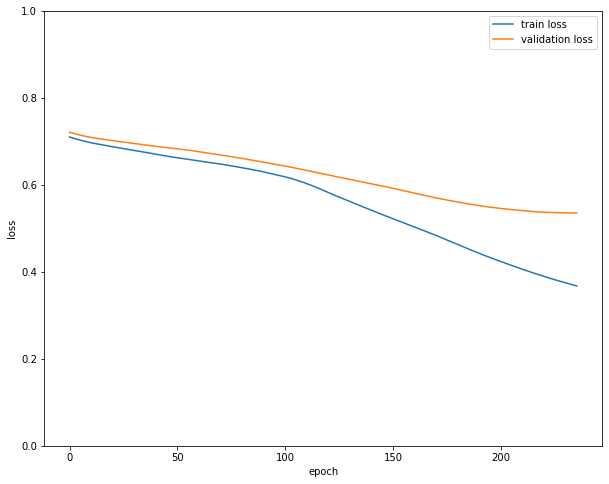

In [11]:
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [12]:
#Define your model with early stopping on test error with patience=10
from keras.callbacks import EarlyStopping
np.random.seed(seed)
tf.set_random_seed(seed)

model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(4, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_3.compile(optimizer='sgd', loss='binary_crossentropy')

# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)

# train the model
history=model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, callbacks=[es_callback], verbose=0, shuffle=False)

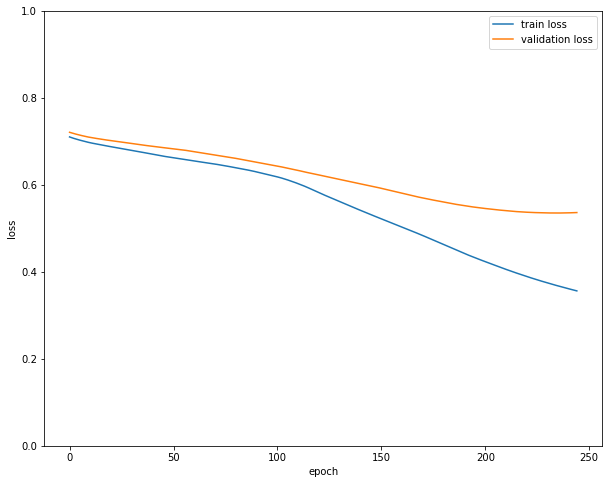

In [13]:
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')